In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set(style="darkgrid", context="talk")
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: "{:,.10f}".format(x))


In [2]:
df=pd.read_csv("../finale.csv")

In [3]:
df=df.drop(columns=["Unnamed: 0"])

In [4]:
df.head()

,adc.100.championId,adc.100.spell1Id,adc.100.spell2Id,adc.100.stats.kills,adc.100.stats.deaths,adc.100.stats.assists,adc.100.stats.largestKillingSpree,adc.100.stats.largestMultiKill,adc.100.stats.killingSprees,adc.100.stats.longestTimeSpentLiving,adc.100.stats.doubleKills,adc.100.stats.tripleKills,adc.100.stats.quadraKills,adc.100.stats.pentaKills,adc.100.stats.totalDamageDealt,adc.100.stats.magicDamageDealt,adc.100.stats.physicalDamageDealt,adc.100.stats.trueDamageDealt,adc.100.stats.largestCriticalStrike,adc.100.stats.totalDamageDealtToChampions,adc.100.stats.magicDamageDealtToChampions,adc.100.stats.physicalDamageDealtToChampions,adc.100.stats.trueDamageDealtToChampions,adc.100.stats.totalHeal,adc.100.stats.totalUnitsHealed,adc.100.stats.damageSelfMitigated,adc.100.stats.damageDealtToObjectives,adc.100.stats.damageDealtToTurrets,adc.100.stats.visionScore,adc.100.stats.timeCCingOthers,adc.100.stats.totalDamageTaken,adc.100.stats.magicalDamageTaken,adc.100.stats.physicalDamageTaken,adc.100.stats.trueDamageTaken,adc.100.stats.goldEarned,adc.100.stats.goldSpent,adc.100.stats.turretKills,adc.100.stats.inhibitorKills,adc.100.stats.totalMinionsKilled,adc.100.stats.neutralMinionsKilled,adc.100.stats.neutralMinionsKilledTeamJungle,adc.100.stats.neutralMinionsKilledEnemyJungle,adc.100.stats.totalTimeCrowdControlDealt,adc.100.stats.champLevel,adc.100.stats.visionWardsBoughtInGame,adc.100.stats.wardsPlaced,adc.100.stats.wardsKilled,adc.100.stats.firstBloodKill,adc.100.stats.firstBloodAssist,adc.100.stats.firstTowerKill,adc.100.stats.firstTowerAssist,adc.100.stats.firstInhibitorKill,adc.100.stats.firstInhibitorAssist,adc.100.timeline.role,adc.100.timeline.lane,adc.100.position,adc.200.championId,adc.200.spell1Id,adc.200.spell2Id,adc.200.stats.kills,adc.200.stats.deaths,adc.200.stats.assists,adc.200.stats.largestKillingSpree,adc.200.stats.largestMultiKill,adc.200.stats.killingSprees,adc.200.stats.longestTimeSpentLiving,adc.200.stats.doubleKills,adc.200.stats.tripleKills,adc.200.stats.quadraKills,adc.200.stats.pentaKills,adc.200.stats.totalDamageDealt,adc.200.stats.magicDamageDealt,adc.200.stats.physicalDamageDealt,adc.200.stats.trueDamageDealt,adc.200.stats.largestCriticalStrike,adc.200.stats.totalDamageDealtToChampions,adc.200.stats.magicDamageDealtToChampions,adc.200.stats.physicalDamageDealtToChampions,adc.200.stats.trueDamageDealtToChampions,adc.200.stats.totalHeal,adc.200.stats.totalUnitsHealed,adc.200.stats.damageSelfMitigated,adc.200.stats.damageDealtToObjectives,adc.200.stats.damageDealtToTurrets,adc.200.stats.visionScore,adc.200.stats.timeCCingOthers,adc.200.stats.totalDamageTaken,adc.200.stats.magicalDamageTaken,adc.200.stats.physicalDamageTaken,adc.200.stats.trueDamageTaken,adc.200.stats.goldEarned,adc.200.stats.goldSpent,adc.200.stats.turretKills,adc.200.stats.inhibitorKills,adc.200.stats.totalMinionsKilled,adc.200.stats.neutralMinionsKilled,adc.200.stats.neutralMinionsKilledTeamJungle,adc.200.stats.neutralMinionsKilledEnemyJungle,adc.200.stats.totalTimeCrowdControlDealt,adc.200.stats.champLevel,...,top.100.stats.totalHeal,top.100.stats.totalUnitsHealed,top.100.stats.damageSelfMitigated,top.100.stats.damageDealtToObjectives,top.100.stats.damageDealtToTurrets,top.100.stats.visionScore,top.100.stats.timeCCingOthers,top.100.stats.totalDamageTaken,top.100.stats.magicalDamageTaken,top.100.stats.physicalDamageTaken,top.100.stats.trueDamageTaken,top.100.stats.goldEarned,top.100.stats.goldSpent,top.100.stats.turretKills,top.100.stats.inhibitorKills,top.100.stats.totalMinionsKilled,top.100.stats.neutralMinionsKilled,top.100.stats.neutralMinionsKilledTeamJungle,top.100.stats.neutralMinionsKilledEnemyJungle,top.100.stats.totalTimeCrowdControlDealt,top.100.stats.champLevel,top.100.stats.visionWardsBoughtInGame,top.100.stats.wardsPlaced,top.100.stats.wardsKilled,top.100.stats.firstBloodKill,top.100.stats.firstBloodAssist,top.100.stats.firstTowerKill,top.100.stats.firstTowerAssist,top.100.stats.firstInhibitorKill,top.100.stats.firstInhibit

In [5]:
df.shape

(19236, 571)

In [6]:
list(df.columns)

['adc.100.championId',
 'adc.100.spell1Id',
 'adc.100.spell2Id',
 'adc.100.stats.kills',
 'adc.100.stats.deaths',
 'adc.100.stats.assists',
 'adc.100.stats.largestKillingSpree',
 'adc.100.stats.largestMultiKill',
 'adc.100.stats.killingSprees',
 'adc.100.stats.longestTimeSpentLiving',
 'adc.100.stats.doubleKills',
 'adc.100.stats.tripleKills',
 'adc.100.stats.quadraKills',
 'adc.100.stats.pentaKills',
 'adc.100.stats.totalDamageDealt',
 'adc.100.stats.magicDamageDealt',
 'adc.100.stats.physicalDamageDealt',
 'adc.100.stats.trueDamageDealt',
 'adc.100.stats.largestCriticalStrike',
 'adc.100.stats.totalDamageDealtToChampions',
 'adc.100.stats.magicDamageDealtToChampions',
 'adc.100.stats.physicalDamageDealtToChampions',
 'adc.100.stats.trueDamageDealtToChampions',
 'adc.100.stats.totalHeal',
 'adc.100.stats.totalUnitsHealed',
 'adc.100.stats.damageSelfMitigated',
 'adc.100.stats.damageDealtToObjectives',
 'adc.100.stats.damageDealtToTurrets',
 'adc.100.stats.visionScore',
 'adc.100.stats

# Variable discretas y continuas

In [7]:
cont_vars=[
 'stats.kills',
 'stats.deaths',
 'stats.assists',
 'stats.largestKillingSpree',
 'stats.largestMultiKill',
 'stats.killingSprees',
 'stats.longestTimeSpentLiving',
 'stats.doubleKills',
 'stats.tripleKills',
 'stats.quadraKills',
 'stats.pentaKills',
 'stats.totalDamageDealt',
 'stats.magicDamageDealt',
 'stats.physicalDamageDealt',
 'stats.trueDamageDealt',
 'stats.largestCriticalStrike',
 'stats.totalDamageDealtToChampions',
 'stats.magicDamageDealtToChampions',
 'stats.physicalDamageDealtToChampions',
 'stats.trueDamageDealtToChampions',
 'stats.totalHeal',
 'stats.totalUnitsHealed',
 'stats.damageSelfMitigated',
 'stats.damageDealtToObjectives',
 'stats.damageDealtToTurrets',
 'stats.visionScore',
 'stats.timeCCingOthers',
 'stats.totalDamageTaken',
 'stats.magicalDamageTaken',
 'stats.physicalDamageTaken',
 'stats.trueDamageTaken',
 'stats.goldEarned',
 'stats.goldSpent',
 'stats.turretKills',
 'stats.inhibitorKills',
 'stats.totalMinionsKilled',
 'stats.neutralMinionsKilled',
 'stats.neutralMinionsKilledTeamJungle',
 'stats.neutralMinionsKilledEnemyJungle',
 'stats.totalTimeCrowdControlDealt',
 'stats.champLevel',
 'stats.visionWardsBoughtInGame',
 'stats.wardsPlaced',
 'stats.wardsKilled']

In [8]:
way=['adc.100','adc.200','jungle.100','jungle.200','mid.100','mid.200','support.100','support.200','top.100','top.200']

In [9]:
cont=[f"{i}.{j}" for i in way for j in cont_vars]

In [10]:
disc=list(df.select_dtypes(include=['object']))

In [11]:
target="win"

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c41b1ab80>,
      dtype=object)

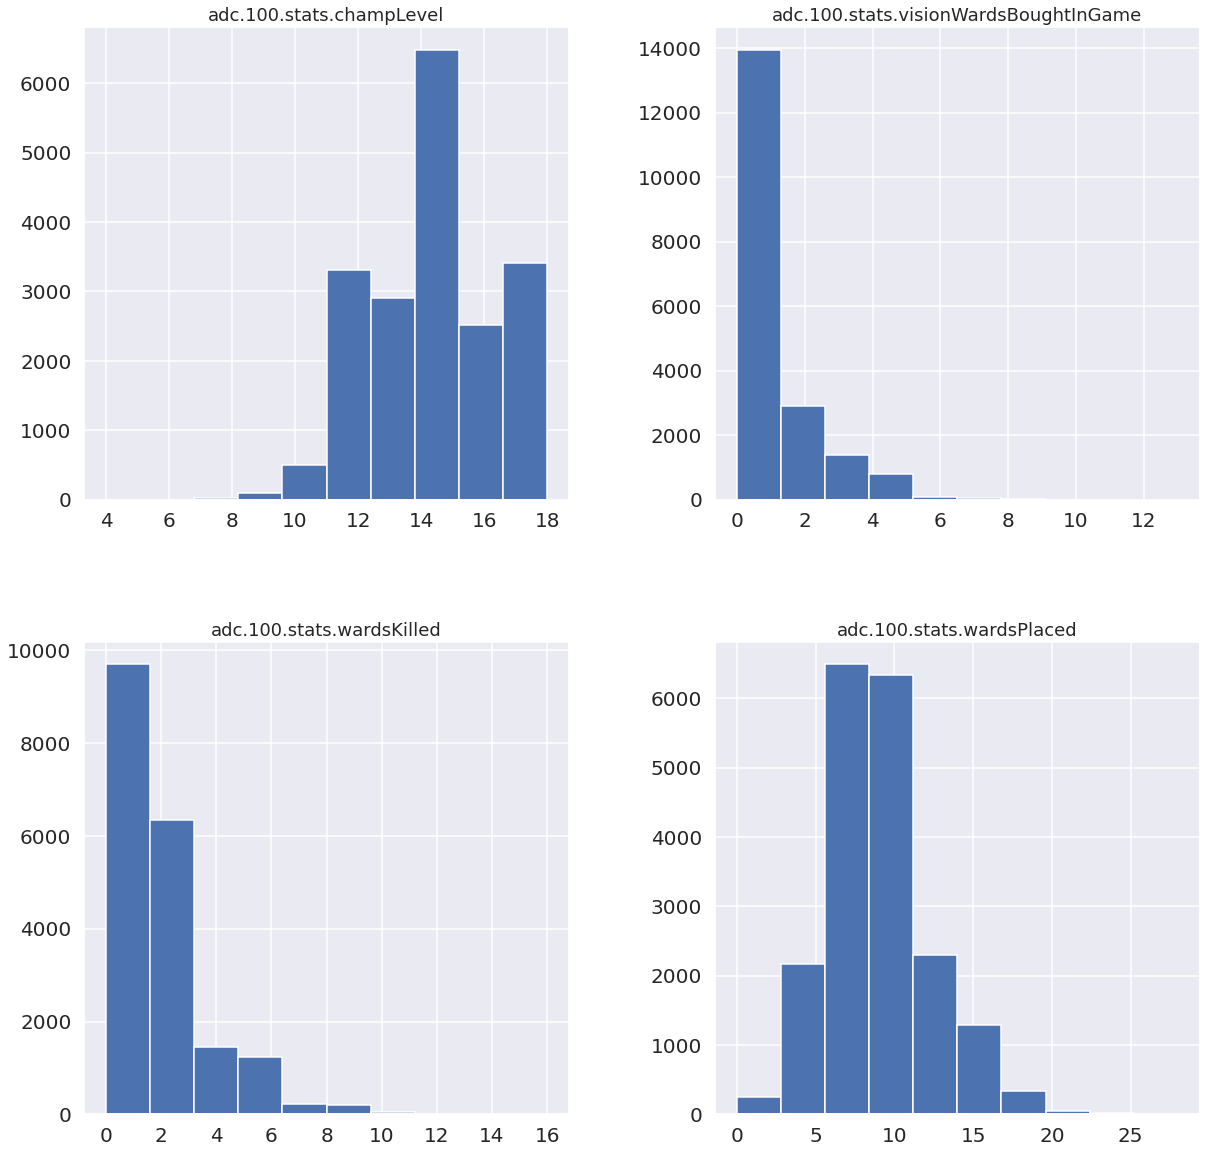

In [12]:
df[cont[40:44]].hist(figsize=(20,20),xlabelsize=20,ylabelsize=20)

In [13]:
def missingsPercentages(df):
  percentageOfMiss=[]
  for i in df.columns.values:
    miss=[i,df[i].isnull().sum()/df.shape[0]*100]
    percentageOfMiss.append(miss)
  return pd.DataFrame(percentageOfMiss,columns=['feat','missings%']).sort_values('missings%',ascending=0).reset_index(drop=True)

In [14]:
missings=missingsPercentages(df[cont])

In [15]:
missings

,feat,missings%
0,adc.100.stats.kills,0.0000000000
1,support.100.stats.visionScore,0.0000000000
2,support.100.stats.neutralMinionsKilled,0.0000000000
3,support.100.stats.totalMinionsKilled,0.0000000000
4,support.100.stats.inhibitorKills,0.0000000000
...,...,...
435,jungle.200.stats.totalDamageDealt,0.0000000000
436,jungle.200.stats.pentaKills,0.0000000000
437,jungle.200.stats.quadraKills,0.0000000000
438,jungle.200.stats.tripleKills,0.0000000000


In [16]:
from sklearn.feature_selection import SelectKBest

In [17]:
sk = SelectKBest(k=40)

In [18]:
sk.fit(df[cont],df[target])

SelectKBest(k=40)

In [19]:
best = [a for a,b in zip(cont,sk.get_support()) if b]

In [20]:
best

['adc.100.stats.largestKillingSpree',
 'adc.100.stats.damageDealtToObjectives',
 'adc.100.stats.damageDealtToTurrets',
 'adc.100.stats.turretKills',
 'adc.100.stats.inhibitorKills',
 'adc.200.stats.largestKillingSpree',
 'adc.200.stats.damageDealtToObjectives',
 'adc.200.stats.damageDealtToTurrets',
 'adc.200.stats.turretKills',
 'adc.200.stats.inhibitorKills',
 'jungle.100.stats.deaths',
 'jungle.100.stats.damageDealtToObjectives',
 'jungle.100.stats.damageDealtToTurrets',
 'jungle.100.stats.turretKills',
 'jungle.100.stats.neutralMinionsKilledEnemyJungle',
 'jungle.200.stats.deaths',
 'jungle.200.stats.damageDealtToObjectives',
 'jungle.200.stats.damageDealtToTurrets',
 'jungle.200.stats.turretKills',
 'mid.100.stats.deaths',
 'mid.100.stats.damageDealtToObjectives',
 'mid.100.stats.damageDealtToTurrets',
 'mid.100.stats.turretKills',
 'mid.200.stats.damageDealtToObjectives',
 'mid.200.stats.damageDealtToTurrets',
 'mid.200.stats.turretKills',
 'support.100.stats.deaths',
 'support.1

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5c3a778df0>,
      dtype=object)

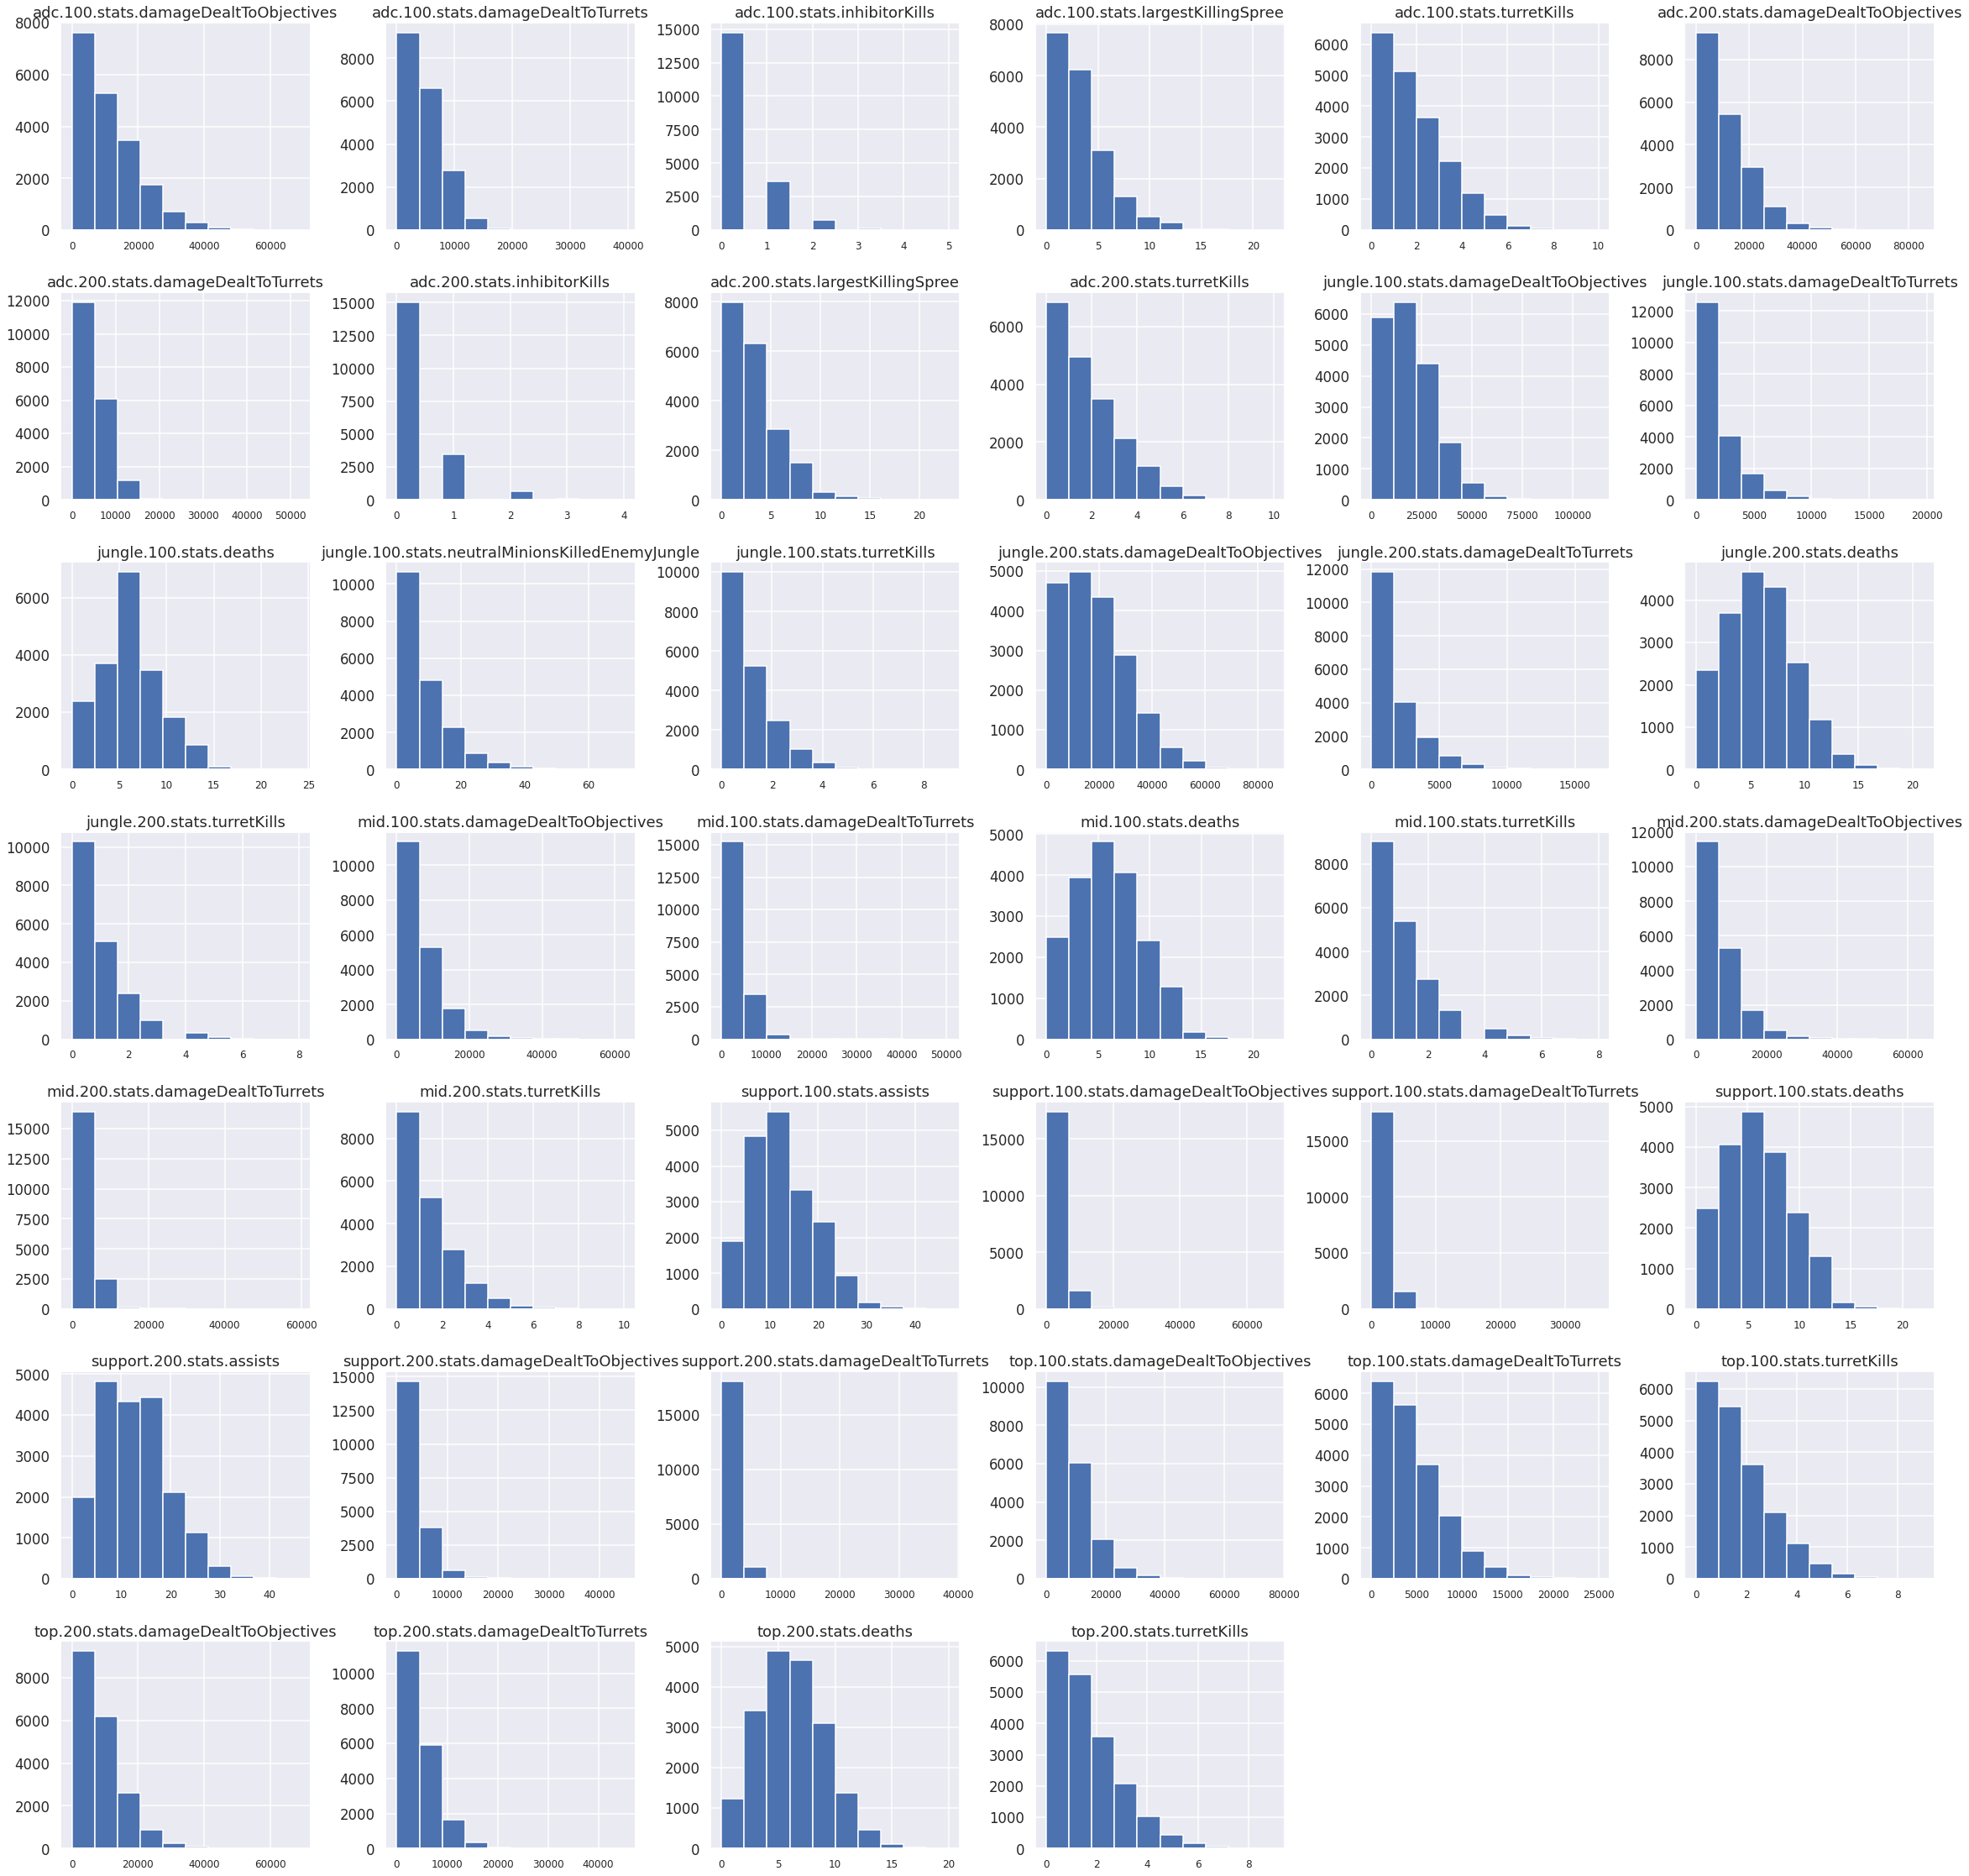

In [21]:
df[best].hist(figsize=(40,40),xlabelsize=12)

In [22]:
df[best].describe(percentiles=[i/10 for i in range(0,10)]+[.01,.02,.03,.99,.98,.97])

,adc.100.stats.largestKillingSpree,adc.100.stats.damageDealtToObjectives,adc.100.stats.damageDealtToTurrets,adc.100.stats.turretKills,adc.100.stats.inhibitorKills,adc.200.stats.largestKillingSpree,adc.200.stats.damageDealtToObjectives,adc.200.stats.damageDealtToTurrets,adc.200.stats.turretKills,adc.200.stats.inhibitorKills,jungle.100.stats.deaths,jungle.100.stats.damageDealtToObjectives,jungle.100.stats.damageDealtToTurrets,jungle.100.stats.turretKills,jungle.100.stats.neutralMinionsKilledEnemyJungle,jungle.200.stats.deaths,jungle.200.stats.damageDealtToObjectives,jungle.200.stats.damageDealtToTurrets,jungle.200.stats.turretKills,mid.100.stats.deaths,mid.100.stats.damageDealtToObjectives,mid.100.stats.damageDealtToTurrets,mid.100.stats.turretKills,mid.200.stats.damageDealtToObjectives,mid.200.stats.damageDealtToTurrets,mid.200.stats.turretKills,support.100.stats.deaths,support.100.stats.assists,support.100.stats.damageDealtToObjectives,support.100.stats.damageDealtToTurrets,support.200.stats.assists,support.200.stats.damageDealtToObjectives,support.200.stats.damageDealtToTurrets,top.100.stats.damageDealtToObjectives,top.100.stats.damageDealtToTurrets,top.100.stats.turretKills,top.200.stats.deaths,top.200.stats.damageDealtToObjectives,top.200.stats.damageDealtToTurrets,top.200.stats.turretKills
count,"19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000","19,236.0000000000"
mean,3.4209814930,"11,187.6436889166","4,640.5147639842",1.4336660428,0.2844666251,3.3269910584,"11,165.3334373051","4,520.3595861926",1.3791848617,0.2628924932,6.1710334789,"19,348.9269598669","1,773.6280931587",0.7991266376,7.9996880848,6.1606363069,"18,852.7168330214","1,727.7479205656",0.7739654814,5.9974526929,"6,500.4206175920","3,300.5577562903",0.9443231441,"6,654.4664171345","3,250.6593886463",0.9241526305,5.9702640882,12.6614160948,"3,101.3506966105","1,485.6546579330",12.6230505303,"3,106.7649199418","1,438.9271158245","8,614.9857558744","4,498.4855479310",1.4213453941,5.7080474111,"8,691.9661572052","4,427.3500207943",1.3908296943
std,2.6639033716,"9,145.6127500424","3,440.3243220146",1.4385671082,0.5661538766,2.6577911349,"9,435.6458933703","3,483.9524650717",1.4349824785,0.5408958988,3.1067758432,"12,620.6620012439","2,021.0381545163",1.0549701727,8.6877437224,3.1102907739,"12,643.8828853536","2,008.4469497136",1.0413145277,3.0634641912,"5,925.8267817976","3,347.0038631645",1.1654271475,"6,184.7014831796","3,333.5963533340",1.1706118651,3.0744762166,6.5631633556,"2,988.6334515251","1,490.4763819747",6.6163134611,"2,987.7106848235","1,499.4494677751","7,038.3776688682","3,483.7298633057",1.4289879386,2.8989783726,"6,908.5465854713","3,472.5344380079",1.4142823480
min,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0000000000
0%,0.0000000000,0.0000000000,0.0000000000,0.0000000000,0.0

In [23]:
def percentiles(df,feat,percentile_minimum,percentile_maximum):
    minimum=np.percentile(df[feat],percentile_minimum)
    maximum=np.percentile(df[feat],percentile_maximum)
    print(minimum,maximum)
    return df[(df[feat]>=minimum) & (df[feat]<=maximum)]

In [24]:
#dropedTable[best].hist(figsize=(40,40),xlabelsize=12)

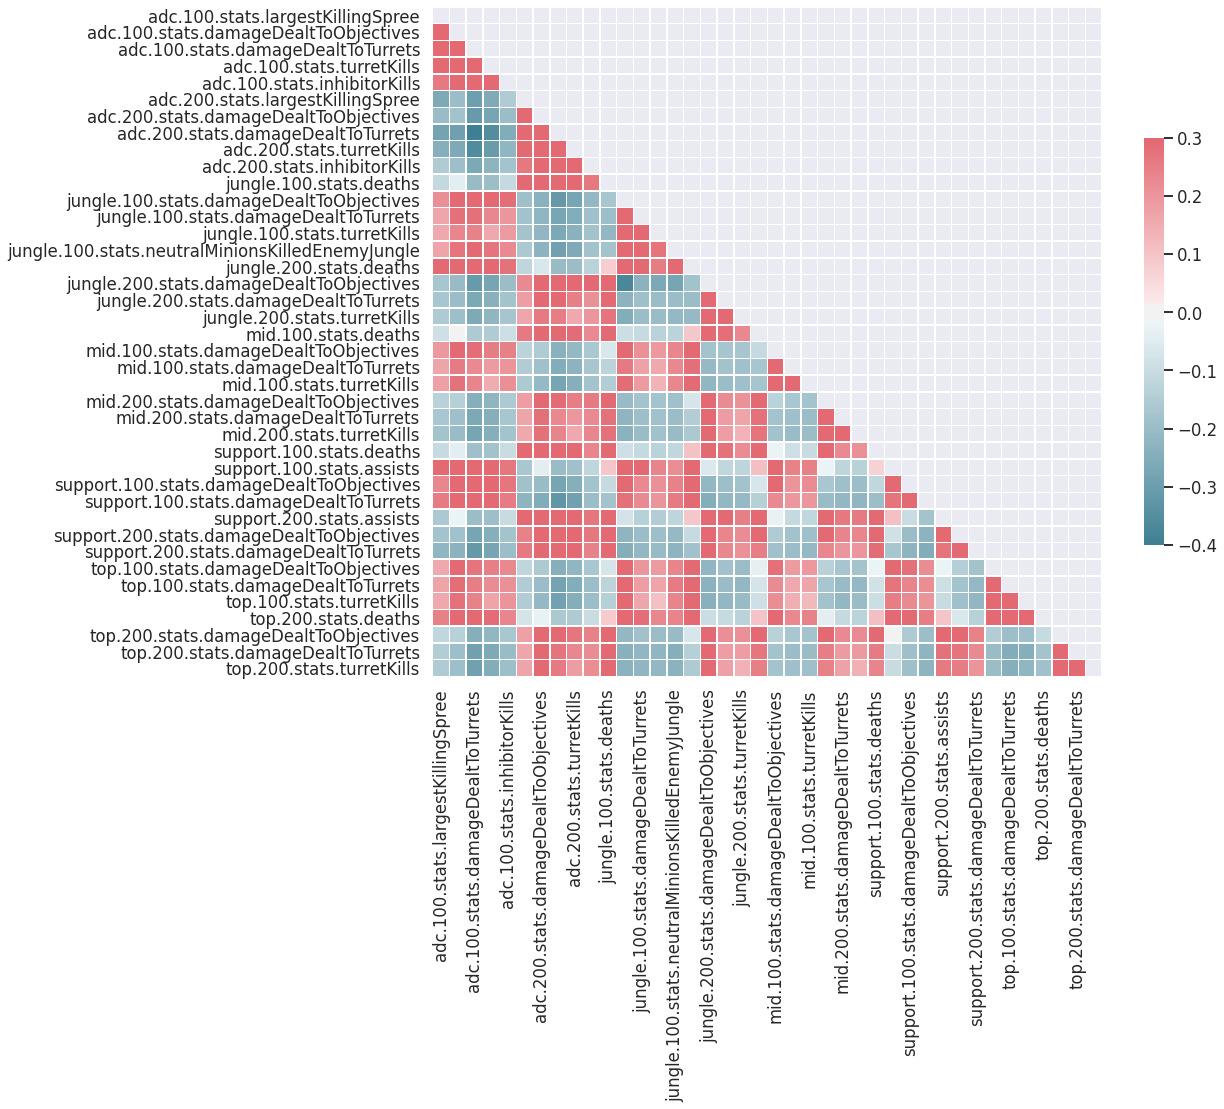

In [25]:
# Compute the correlation matrix
corr = df[best].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost.sklearn import XGBClassifier


from sklearn.metrics import classification_report, confusion_matrix

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV

In [27]:
Xt,Xv,yt,yv = train_test_split(df[best],df[target],train_size=0.7)

In [28]:
knn = KNeighborsClassifier()

In [29]:
ls_res = cross_val_score(estimator = knn, X=Xt, y=yt, cv=4, n_jobs=-1, scoring="roc_auc")

In [30]:
np.mean(ls_res), np.std(ls_res)

(0.9773133687805586, 0.0021611688096247897)

In [31]:
xgb = XGBClassifier()

In [32]:
ls_res = cross_val_score(estimator = xgb, X=Xt, y=yt, cv=4, n_jobs=-1, scoring="roc_auc")

In [33]:
np.mean(ls_res), np.std(ls_res)

(0.9959659935724663, 0.0006345014467819998)

In [34]:
log = LogisticRegression()

In [35]:
ls_res = cross_val_score(estimator = log, X=Xt, y=yt, cv=4, n_jobs=-1, scoring="roc_auc")

In [36]:
np.mean(ls_res), np.std(ls_res)

(0.9926389433290586, 0.0011627028170323303)

In [55]:
log.fit(Xt,yt)

/home/arturo/virtualenv/data/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [56]:
confusion_matrix(yt, log.predict(Xt))

array([[6591,  281],
       [ 273, 6320]])

In [57]:
confusion_matrix(yv,log.predict(Xv))

array([[2776,  129],
       [ 137, 2729]])

In [40]:
from sklearn.metrics import classification_report

In [52]:
report = classification_report(yv, xgb.predict(Xv))
print(report)

              precision    recall  f1-score   support

         100       0.97      0.97      0.97      2905
         200       0.97      0.97      0.97      2866

    accuracy                           0.97      5771
   macro avg       0.97      0.97      0.97      5771
weighted avg       0.97      0.97      0.97      5771



In [42]:
knn.fit(Xt,yt)

KNeighborsClassifier()

In [43]:
confusion_matrix(yt, knn.predict(Xt))

array([[6572,  300],
       [ 298, 6295]])

In [44]:
confusion_matrix(yv,knn.predict(Xv))

array([[2731,  174],
       [ 193, 2673]])

In [45]:
from sklearn import metrics